In [18]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# path

In [52]:
data_folder = "/home/subblue-3/nextGen/data/attitude_estimation_in_lab_20250820/"
output_display_folder = "/home/subblue-3/nextGen/data/attitude_estimation_in_lab_20250820/4_interpolate_display/"

# read data

In [6]:
df_sort_roll_raw = pd.read_excel(os.path.join(data_folder, "3_sort_roll_true.xlsx"))
df_sort_roll_raw

,roll_true,pitch_true,max_contour_area,diameter_distance,diameter_orientation,diameter_pnt1_x,diameter_pnt1_y,diameter_pnt2_x,diameter_pnt2_y,pole_left_x,...,pole_bottom_y,pole_orientation_lr,pole_orientation_tb,touch_line_topmost_point_x,touch_line_topmost_point_y,touch_line_bottommost_point_x,touch_line_bottommost_point_y,touch_line_total_length,touch_line_direct_distance,touch_line_num_points
0,-22.92,17.60,75981,463,67.42,276,207,454,635,207,...,647,35.83,82.09,376,210,495,603,455,410,219
1,-21.27,6.51,75291,484,62.16,251,244,477,672,223,...,693,39.85,87.38,377,212,469,674,532,471,240
2,-18.78,-4.46,82325,497,76.75,315,251,429,735,224,...,737,38.78,85.45,443,263,452,724,498,461,221
3,-16.01,-15.29,78487,487,91.53,347,775,360,288,242,...,775,150.83,91.18,462,324,435,757,467,433,192
4,-13.13,19.76,71442,466,67.17,273,204,454,634,232,...,635,36.87,75.23,348,198,491,600,490,426,207
5,-12.76,-25.97,74378,474,108.43,294,793,444,343,233,...,797,143.44,94.29,476,364,415,783,453,423,184
6,-11.40,8.85,76456,476,70.12,289,226,451,674,220,...,680,42.68,87.65,404,227,484,648,469,428,222
7,-9.44,-2.00,77350,500,80.80,358,253,438,747,239,...,747,36.59,82.73,442,272,452,722,487,450,218
8,-7.24,-12.79,76665,507,94.63,398,800,439,294,248,...,800,146.21,94.07,451,298,414,785,533,488,224
9,-4.81,-23.53,63971,466,102.01,361,804,458,348,278,...,804,147.15,98.91,481,360,414,786,462,431,200


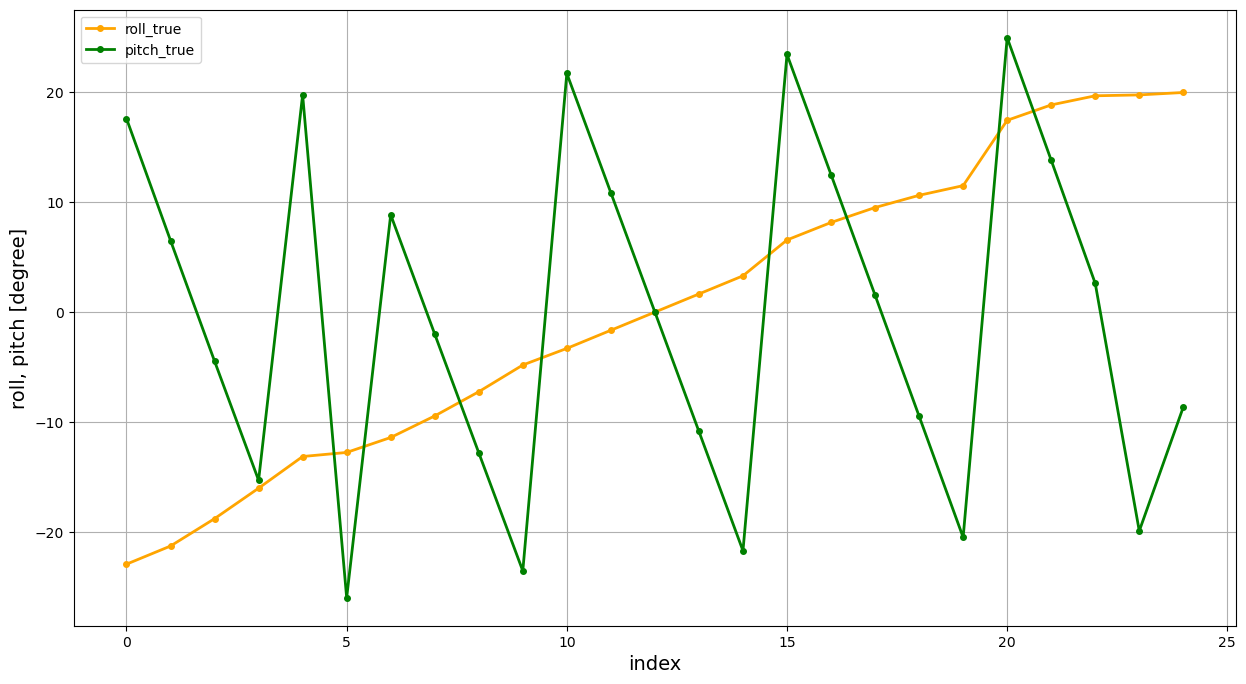

In [14]:
plt.figure(figsize=(15, 8))
plt.plot(df_sort_roll_raw.index, df_sort_roll_raw['roll_true'], 'o-', color='orange', label='roll_true', linewidth=2, markersize=4)
plt.plot(df_sort_roll_raw.index, df_sort_roll_raw['pitch_true'], 'o-', color='green', label='pitch_true', linewidth=2, markersize=4)
plt.xlabel("index", size=14)
plt.ylabel("roll, pitch [degree]", size=14)
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

# interpolate for roll

In [20]:
raw_sample_num = df_sort_roll_raw.shape[0]
raw_sample_num

25

In [45]:
target_sample_num = 150

In [46]:
# Create original x-axis (sample indices)
x_raw = np.linspace(0, 1, raw_sample_num)
# Create new x-axis for interpolated data
x_new = np.linspace(0, 1, target_sample_num)

x_raw, x_new

(array([0.        , 0.04166667, 0.08333333, 0.125     , 0.16666667,
        0.20833333, 0.25      , 0.29166667, 0.33333333, 0.375     ,
        0.41666667, 0.45833333, 0.5       , 0.54166667, 0.58333333,
        0.625     , 0.66666667, 0.70833333, 0.75      , 0.79166667,
        0.83333333, 0.875     , 0.91666667, 0.95833333, 1.        ]),
 array([0.        , 0.00671141, 0.01342282, 0.02013423, 0.02684564,
        0.03355705, 0.04026846, 0.04697987, 0.05369128, 0.06040268,
        0.06711409, 0.0738255 , 0.08053691, 0.08724832, 0.09395973,
        0.10067114, 0.10738255, 0.11409396, 0.12080537, 0.12751678,
        0.13422819, 0.1409396 , 0.14765101, 0.15436242, 0.16107383,
        0.16778523, 0.17449664, 0.18120805, 0.18791946, 0.19463087,
        0.20134228, 0.20805369, 0.2147651 , 0.22147651, 0.22818792,
        0.23489933, 0.24161074, 0.24832215, 0.25503356, 0.26174497,
        0.26845638, 0.27516779, 0.28187919, 0.2885906 , 0.29530201,
        0.30201342, 0.30872483, 0.31543624, 0.

In [61]:
from scipy.interpolate import CubicSpline, interp1d

def interpolate_dataset(df, raw_sample_num, target_sample_num, method):
    df_interpolated_data = pd.DataFrame()
    # method = 'cubic_spline'
    
    # Create original x-axis (sample indices)
    x_raw = np.linspace(0, 1, raw_sample_num)
    # Create new x-axis for interpolated data
    x_new = np.linspace(0, 1, target_sample_num)

    # interpolate
    for column in df.columns:
            # print(f"Processing: {column}")
            y_original = df[column].values
            y_interpolated = []
            
            if method == 'cubic_spline':
                # Use cubic spline for smooth interpolation
                cs = CubicSpline(x_raw, y_original)
                y_interpolated = cs(x_new)
                
                if column in ['roll_true', 'pitch_true']:
                    y_interpolated = np.round(y_interpolated, 2)
                else:
                    y_interpolated = np.round(y_interpolated).astype(int)
                # print(y_interpolated)
            elif method == 'linear':
                # Linear interpolation
                f = interp1d(x_raw, y_original, kind='linear')
                y_interpolated = f(x_new)
            elif method == 'quadratic':
                # Quadratic interpolation
                f = interp1d(x_raw, y_original, kind='quadratic')
                y_interpolated = f(x_new)
            else:
                raise ValueError("Method must be 'cubic_spline', 'linear', or 'quadratic'")
            
            df_interpolated_data[column] = y_interpolated
            
    return df_interpolated_data

## + quadratic interpolate

In [81]:
df_roll_quadratic_interpolated_data = interpolate_dataset(df_sort_roll_raw, raw_sample_num, target_sample_num, 'quadratic')
df_roll_quadratic_interpolated_data.shape

(150, 26)

In [82]:
df_roll_quadratic_interpolated_data

,roll_true,pitch_true,max_contour_area,diameter_distance,diameter_orientation,diameter_pnt1_x,diameter_pnt1_y,diameter_pnt2_x,diameter_pnt2_y,pole_left_x,...,pole_bottom_y,pole_orientation_lr,pole_orientation_tb,touch_line_topmost_point_x,touch_line_topmost_point_y,touch_line_bottommost_point_x,touch_line_bottommost_point_y,touch_line_total_length,touch_line_direct_distance,touch_line_num_points
0,-22.920000,17.600000,75981.000000,463.000000,67.420000,276.000000,207.000000,454.000000,635.000000,207.000000,...,647.000000,35.830000,82.090000,376.000000,210.000000,495.000000,603.000000,455.000000,410.000000,219.000000
1,-22.718238,15.660824,75122.303471,466.741347,65.127535,264.781268,225.456261,462.616806,629.828304,211.066424,...,655.043053,39.046602,83.683888,370.799322,207.154749,489.865681,616.470596,476.076254,425.153418,225.290575
2,-22.491896,13.780350,74550.668289,470.344917,63.390034,256.324220,239.113855,469.347363,628.931076,214.560979,...,662.842781,41.276675,84.992923,367.657557,205.525780,485.094780,629.160001,493.821857,438.260916,230.464469
3,-22.240975,11.958576,74266.094453,473.810708,62.207495,250.628856,247.972781,474.191670,632.308317,217.483665,...,670.399186,42.520219,86.017103,366.574704,205.113091,480.687296,641.068213,508.236810,449.322496,234.521681
4,-21.965474,10.195503,74268.581963,477.138721,61.579920,247.695178,252.033040,477.149727,639.960025,219.834481,...,677.712266,42.777235,86.756428,367.550764,205.916683,476.643229,652.195232,519.321112,458.338156,237.462212
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,19.790767,-20.731360,56565.896702,497.846085,100.125314,463.953938,438.162759,394.390132,711.907043,326.227306,...,821.012233,161.938495,100.090432,472.797597,329.079265,386.559124,821.150230,1040.785810,497.988575,230.187253
146,19.822843,-19.349845,56158.438635,496.838305,99.583395,457.558744,508.042675,405.000442,635.009165,329.785984,...,817.327214,163.585773,99.531175,472.362780,325.748266,390.732983,817.696397,1039.176706,497.212383,225.611215
147,19.863408,-16.872447,55588.469828,495.528032,98.510203,448.601356,588.975520,420.138857,539.558699,334.934325,...,809.930169,161.616783,98.439684,470.584908,318.624722,398.197749,810.353414,1036.342703,495.955557,220.387994
148,19.912460,-13.299165,54855.990284,493.915263,96.905738,437.081775,680.961295,439.805376,425.555644,341.672331,...,798.821098,156.031526,96.815959,467.463981,307.708633,408.953421,799.121281,1032.283801,494.218096,214.517589


### save interpolate result

In [83]:
df_roll_quadratic_interpolated_data.to_excel(os.path.join(data_folder, "4_sort_roll_interpolate_250_quadratic.xlsx"), index=False)

### display roll & pitch

In [ ]:
#====================== display roll & pitch =====================#

# display roll + pitch
plt.figure(figsize=(15, 8))
plt.plot(x_raw, df_sort_roll_raw['roll_true'], 'o-', color='red', alpha=0.5, label='raw roll true', linewidth=2,
         markersize=3)
plt.plot(x_raw, df_sort_roll_raw['pitch_true'], 'o-', color='blue', alpha=0.5, label='raw pitch true', linewidth=2,
         markersize=3)
plt.plot(x_new, df_roll_quadratic_interpolated_data['roll_true'], 'o-', color='red', label='interpolate roll true', linewidth=2,
         markersize=3)
plt.plot(x_new, df_roll_quadratic_interpolated_data['pitch_true'], 'o-', color='blue', label='interpolate pitch true', linewidth=2,
         markersize=3)
plt.legend(loc='upper left')
plt.grid(True, alpha=0.5)
plt.savefig(os.path.join(output_display_folder, "sort_roll_interpolate_quadratic__roll+pitch.png"), dpi=300,
            bbox_inches='tight')
plt.show()
plt.close()

In [74]:
#====================== display roll - related =====================#

# display roll - diameter & area
plt.figure(figsize=(15, 8))
plt.plot(df_roll_quadratic_interpolated_data['roll_true'], df_roll_quadratic_interpolated_data['diameter_pnt1_x'], 'o-', color = 'red', alpha=0.5, label='diameter_pnt1_x', linewidth=2, markersize=4)
plt.plot(df_roll_quadratic_interpolated_data['roll_true'], df_roll_quadratic_interpolated_data['diameter_pnt1_y'], 'o-', color = 'blue', alpha=0.5, label='diameter_pnt1_y', linewidth=2, markersize=4)
plt.plot(df_roll_quadratic_interpolated_data['roll_true'], df_roll_quadratic_interpolated_data['diameter_pnt2_x'], 'o-', color = 'green', alpha=0.5, label='diameter_pnt2_x', linewidth=2, markersize=4)
plt.plot(df_roll_quadratic_interpolated_data['roll_true'], df_roll_quadratic_interpolated_data['diameter_pnt2_y'], 'o-', color = 'cyan', alpha=0.5, label='diameter_pnt2_y', linewidth=2, markersize=4)
plt.plot(df_roll_quadratic_interpolated_data['roll_true'], df_roll_quadratic_interpolated_data['diameter_orientation'], 'o-', color = 'violet', alpha=0.5, label='diameter_orientation', linewidth=2, markersize=4)
plt.plot(df_roll_quadratic_interpolated_data['roll_true'], df_roll_quadratic_interpolated_data['diameter_distance'], 'o-', color = 'brown', alpha=0.5, label='diameter_distance', linewidth=2, markersize=4)
plt.plot(df_roll_quadratic_interpolated_data['roll_true'], df_roll_quadratic_interpolated_data['max_contour_area']/100, 'o-', color = 'black', alpha=0.5, label='max_contour_area / 100', linewidth=2, markersize=4)
plt.legend(loc='upper left')
plt.grid(True, alpha = 0.5)
plt.title("roll - diameter & area", fontsize=20)
plt.xlabel("roll [degree]", fontsize=14)
plt.ylabel("diameter & area", fontsize=14)
plt.savefig(os.path.join(output_display_folder, "sort_roll_interpolate_quadratic__diameter.png"), dpi=300, bbox_inches='tight')
# plt.show()
plt.close()



# display roll - pole
plt.figure(figsize=(15, 8))
plt.plot(df_roll_quadratic_interpolated_data['roll_true'], df_roll_quadratic_interpolated_data['pole_left_x'], 'o-', color = 'red', alpha=0.5, label='pole_left_x', linewidth=2, markersize=4)
plt.plot(df_roll_quadratic_interpolated_data['roll_true'], df_roll_quadratic_interpolated_data['pole_left_y'], 'o-', color = 'blue', alpha=0.5, label='pole_left_y', linewidth=2, markersize=4)
plt.plot(df_roll_quadratic_interpolated_data['roll_true'], df_roll_quadratic_interpolated_data['pole_right_x'], 'o-', color = 'green', alpha=0.5, label='pole_right_x', linewidth=2, markersize=4)
plt.plot(df_roll_quadratic_interpolated_data['roll_true'], df_roll_quadratic_interpolated_data['pole_right_y'], 'o-', color = 'cyan', alpha=0.5, label='pole_right_y', linewidth=2, markersize=4)
plt.plot(df_roll_quadratic_interpolated_data['roll_true'], df_roll_quadratic_interpolated_data['pole_top_x'], 'o-', color = 'yellow', alpha=0.5, label='pole_top_x', linewidth=2, markersize=4)
plt.plot(df_roll_quadratic_interpolated_data['roll_true'], df_roll_quadratic_interpolated_data['pole_top_y'], 'o-', color = 'black', alpha=0.5, label='pole_top_y', linewidth=2, markersize=4)
plt.plot(df_roll_quadratic_interpolated_data['roll_true'], df_roll_quadratic_interpolated_data['pole_bottom_x'], 'o-', color = 'magenta', alpha=0.5, label='pole_bottom_x', linewidth=2, markersize=4)
plt.plot(df_roll_quadratic_interpolated_data['roll_true'], df_roll_quadratic_interpolated_data['pole_bottom_y'], 'o-', color = 'purple', alpha=0.5, label='pole_bottom_y', linewidth=2, markersize=4)
plt.plot(df_roll_quadratic_interpolated_data['roll_true'], df_roll_quadratic_interpolated_data['pole_orientation_lr'], 'o-', color = 'brown', alpha=0.5, label='pole_orientation_lr', linewidth=2, markersize=4)
plt.plot(df_roll_quadratic_interpolated_data['roll_true'], df_roll_quadratic_interpolated_data['pole_orientation_tb'], 'o-', color = 'orange', alpha=0.5, label='pole_orientation_tb', linewidth=2, markersize=4)
plt.legend(loc='upper left')
plt.grid(True, alpha = 0.5)
plt.title("roll - pole", fontsize=20)
plt.xlabel("roll [degree]", fontsize=14)
plt.ylabel("pole", fontsize=14)
plt.savefig(os.path.join(output_display_folder, "sort_roll_interpolate_quadratic__poles.png"), dpi=300, bbox_inches='tight')
# plt.show()
plt.close()


# display roll - touch line
plt.figure(figsize=(15, 8))
plt.plot(df_roll_quadratic_interpolated_data['roll_true'], df_roll_quadratic_interpolated_data['touch_line_topmost_point_x'], 'o-', color = 'red', alpha=0.5, label='touch_line_topmost_point_x', linewidth=2, markersize=4)
plt.plot(df_roll_quadratic_interpolated_data['roll_true'], df_roll_quadratic_interpolated_data['touch_line_topmost_point_y'], 'o-', color = 'blue', alpha=0.5, label='touch_line_topmost_point_y', linewidth=2, markersize=4)
plt.plot(df_roll_quadratic_interpolated_data['roll_true'], df_roll_quadratic_interpolated_data['touch_line_bottommost_point_x'], 'o-', color = 'green', alpha=0.5, label='touch_line_bottommost_point_x', linewidth=2, markersize=4)
plt.plot(df_roll_quadratic_interpolated_data['roll_true'], df_roll_quadratic_interpolated_data['touch_line_bottommost_point_y'], 'o-', color = 'cyan', alpha=0.5, label='touch_line_bottommost_point_y', linewidth=2, markersize=4)
plt.plot(df_roll_quadratic_interpolated_data['roll_true'], df_roll_quadratic_interpolated_data['touch_line_total_length'], 'o-', color = 'yellow', alpha=0.5, label='touch_line_total_length', linewidth=2, markersize=4)
plt.plot(df_roll_quadratic_interpolated_data['roll_true'], df_roll_quadratic_interpolated_data['touch_line_num_points'], 'o-', color = 'black', alpha=0.5, label='touch_line_num_points', linewidth=2, markersize=4)
plt.legend(loc='upper left')
plt.grid(True, alpha = 0.5)
plt.title("roll - window touch", fontsize=20)
plt.xlabel("roll [degree]", fontsize=14)
plt.ylabel("window touch", fontsize=14)
plt.savefig(os.path.join(output_display_folder, "sort_roll_interpolate_quadratic__window_touch.png"), dpi=300, bbox_inches='tight')
# plt.show()
plt.close()


## - cubic_spline interpolate

In [62]:
df_interpolated_data = interpolate_dataset(df_sort_roll_raw, raw_sample_num, target_sample_num, 'cubic_spline')

df_interpolated_data.shape

(150, 26)

In [63]:
df_interpolated_data

,roll_true,pitch_true,max_contour_area,diameter_distance,diameter_orientation,diameter_pnt1_x,diameter_pnt1_y,diameter_pnt2_x,diameter_pnt2_y,pole_left_x,...,pole_bottom_y,pole_orientation_lr,pole_orientation_tb,touch_line_topmost_point_x,touch_line_topmost_point_y,touch_line_bottommost_point_x,touch_line_bottommost_point_y,touch_line_total_length,touch_line_direct_distance,touch_line_num_points
0,-22.92,17.60,75981,463,67,276,207,454,635,207,...,647,36,82,376,210,495,603,455,410,219
1,-22.75,14.48,74324,466,65,262,278,461,586,213,...,659,50,85,369,210,488,621,480,427,225
2,-22.54,12.07,73405,470,64,252,315,468,565,217,...,669,57,87,365,210,482,636,499,441,231
3,-22.29,10.21,73122,473,63,246,324,472,568,220,...,677,58,88,364,210,477,648,513,452,235
4,-22.00,8.79,73371,476,62,244,313,476,589,222,...,683,55,88,366,210,474,658,523,460,238
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,19.72,-23.35,57199,498,101,469,428,385,740,321,...,830,174,101,476,338,378,831,1045,499,230
146,19.73,-22.67,56960,497,101,463,495,393,671,323,...,828,178,101,476,338,380,830,1044,499,226
147,19.77,-20.18,56386,496,100,454,575,408,576,329,...,821,176,100,474,330,388,822,1041,497,221
148,19.85,-15.60,55410,494,98,441,671,432,451,337,...,806,166,98,470,316,402,808,1036,495,215


### save interpolate result

In [49]:
df_interpolated_data.to_excel(os.path.join(data_folder, "4_sort_roll_interpolate_250.xlsx"), index=False)

### display roll & pitch

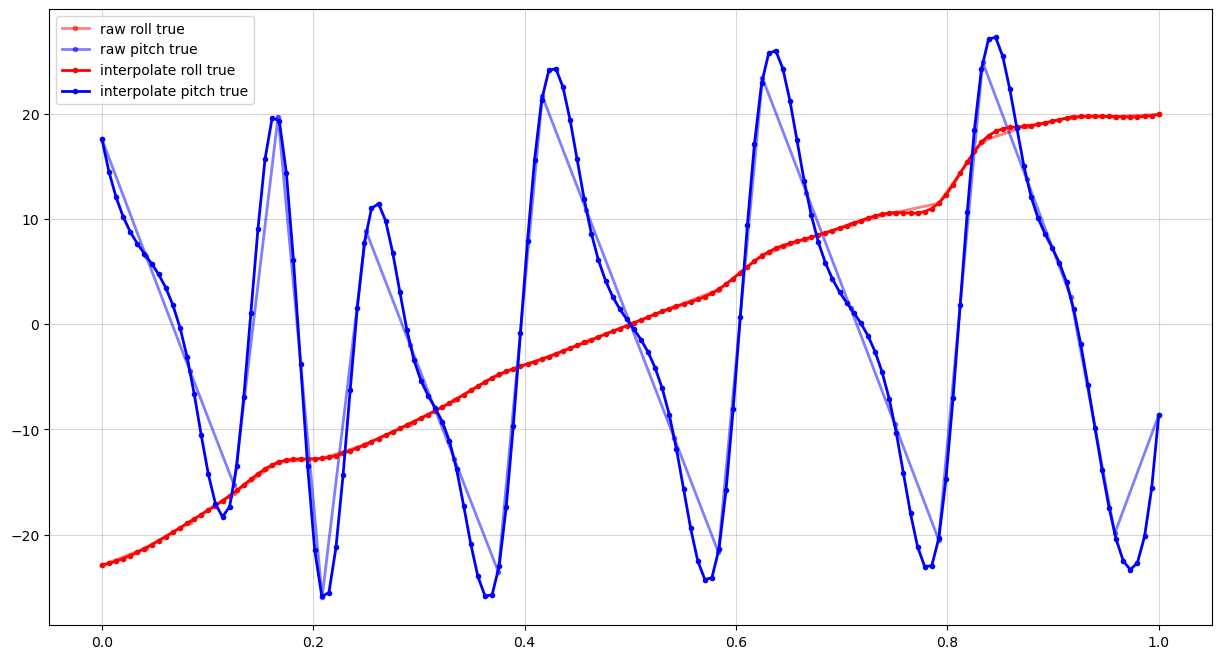

In [59]:
#====================== display roll & pitch =====================#


# display roll + pitch
plt.figure(figsize=(15, 8))
plt.plot(x_raw, df_sort_roll_raw['roll_true'], 'o-', color = 'red', alpha=0.5, label='raw roll true', linewidth=2, markersize=3)
plt.plot(x_raw, df_sort_roll_raw['pitch_true'], 'o-', color = 'blue', alpha=0.5, label='raw pitch true', linewidth=2, markersize=3)
plt.plot(x_new, df_interpolated_data['roll_true'], 'o-', color = 'red', label='interpolate roll true', linewidth=2, markersize=3)
plt.plot(x_new, df_interpolated_data['pitch_true'], 'o-', color = 'blue', label='interpolate pitch true', linewidth=2, markersize=3)
plt.legend(loc='upper left')
plt.grid(True, alpha = 0.5)
plt.savefig(os.path.join(output_display_folder, "sort_roll_interpolate__roll+pitch.png"), dpi=300, bbox_inches='tight')
plt.show()
plt.close()

# interpolate for pitch

In [80]:
df_sort_pitch_raw = pd.read_excel(os.path.join(data_folder, "3_sort_pitch_true.xlsx"))
df_sort_pitch_raw

,roll_true,pitch_true,max_contour_area,diameter_distance,diameter_orientation,diameter_pnt1_x,diameter_pnt1_y,diameter_pnt2_x,diameter_pnt2_y,pole_left_x,...,pole_bottom_y,pole_orientation_lr,pole_orientation_tb,touch_line_topmost_point_x,touch_line_topmost_point_y,touch_line_bottommost_point_x,touch_line_bottommost_point_y,touch_line_total_length,touch_line_direct_distance,touch_line_num_points
0,-12.76,-25.97,74378,474,108.43,294,793,444,343,233,...,797,143.44,94.29,476,364,415,783,453,423,184
1,-4.81,-23.53,63971,466,102.01,361,804,458,348,278,...,804,147.15,98.91,481,360,414,786,462,431,200
2,3.30,-21.70,77741,494,101.56,377,825,476,341,255,...,825,151.34,96.59,481,360,389,815,496,464,200
3,11.50,-20.48,65495,491,99.73,391,816,474,332,273,...,816,140.12,99.15,469,332,391,816,1021,490,219
4,19.75,-19.90,56890,499,99.44,469,323,387,816,324,...,816,145.49,99.44,469,323,389,815,1040,498,238
5,-16.01,-15.29,78487,487,91.53,347,775,360,288,242,...,775,150.83,91.18,462,324,435,757,467,433,192
6,-7.24,-12.79,76665,507,94.63,398,800,439,294,248,...,800,146.21,94.07,451,298,414,785,533,488,224
7,1.65,-10.85,71521,493,91.86,409,792,425,299,268,...,792,148.60,91.39,470,316,414,790,509,477,219
8,10.62,-9.46,67173,499,94.82,419,791,461,293,305,...,791,136.65,94.13,455,293,419,791,1044,499,237
9,19.97,-8.63,53961,492,94.77,423,784,464,293,350,...,784,146.83,94.66,463,293,423,784,1027,492,208


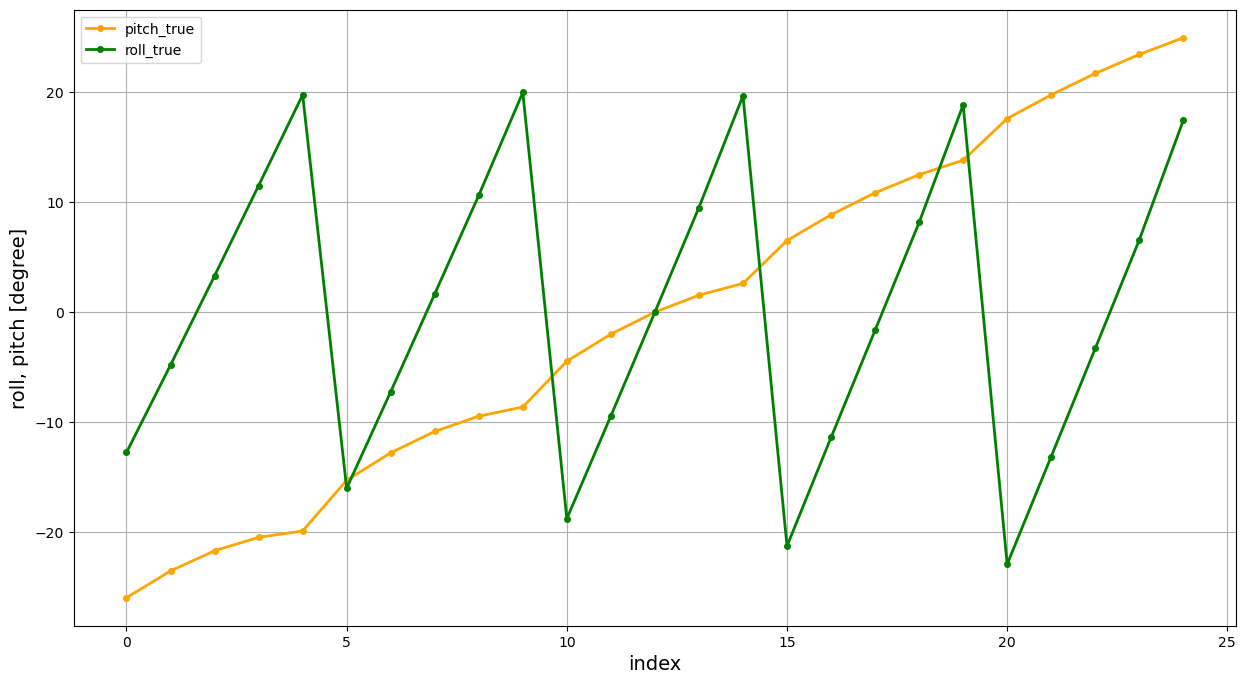

In [76]:
plt.figure(figsize=(15, 8))
plt.plot(df_sort_pitch_raw.index, df_sort_pitch_raw['pitch_true'], 'o-', color='orange', label='pitch_true', linewidth=2, markersize=4)
plt.plot(df_sort_pitch_raw.index, df_sort_pitch_raw['roll_true'], 'o-', color='green', label='roll_true', linewidth=2, markersize=4)
plt.xlabel("index", size=14)
plt.ylabel("roll, pitch [degree]", size=14)
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

## + quadratic interpolate

In [77]:
df_pitch_quadratic_interpolated_data = interpolate_dataset(df_sort_pitch_raw, raw_sample_num, target_sample_num, 'quadratic')
df_pitch_quadratic_interpolated_data.shape
df_pitch_quadratic_interpolated_data

,roll_true,pitch_true,max_contour_area,diameter_distance,diameter_orientation,diameter_pnt1_x,diameter_pnt1_y,diameter_pnt2_x,diameter_pnt2_y,pole_left_x,...,pole_bottom_y,pole_orientation_lr,pole_orientation_tb,touch_line_topmost_point_x,touch_line_topmost_point_y,touch_line_bottommost_point_x,touch_line_bottommost_point_y,touch_line_total_length,touch_line_direct_distance,touch_line_num_points
0,-12.760000,-25.970000,74378.000000,474.000000,108.430000,294.000000,793.000000,444.000000,343.000000,233.000000,...,797.000000,143.440000,94.290000,476.000000,364.000000,415.000000,783.000000,453.000000,423.000000,184.000000
1,-11.511667,-25.533737,70439.754547,469.404482,106.897128,308.560361,795.107330,445.880359,343.138085,246.051850,...,796.569596,143.752444,95.650815,477.008125,362.620993,417.138721,781.020585,460.035300,422.218278,188.069894
2,-10.250968,-25.114080,67370.097952,466.078824,105.555786,321.673651,797.085821,447.904593,343.532407,256.875146,...,796.737433,144.174382,96.774835,477.938391,361.524115,418.394321,779.986822,464.925716,422.231557,191.566586
3,-8.977902,-24.711028,65169.030215,464.023026,104.405976,333.339870,798.935473,450.072703,344.182967,265.469887,...,797.503512,144.705813,97.662059,478.790800,360.709367,418.766799,779.898712,467.671248,423.039835,194.490076
4,-7.692470,-24.324580,63836.551336,463.237088,103.447696,343.559017,800.656286,452.384687,345.089763,271.836073,...,798.867833,145.346739,98.312489,479.565350,360.176748,418.256157,780.756254,468.271896,424.643113,196.840365
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,10.334732,23.993497,62422.015970,483.192667,73.340048,344.031424,193.144196,482.473452,656.466299,279.881135,...,656.432809,49.534495,73.426271,349.183428,192.052437,485.674922,645.610446,1002.824729,472.790605,254.570694
146,12.078671,24.240375,61154.142987,480.823902,72.804336,340.873040,193.853143,482.903468,653.605279,283.917431,...,653.568787,49.752750,73.115810,348.424700,192.146759,485.735410,644.621120,1000.987474,471.986192,254.830179
147,13.844195,24.482084,60011.349331,478.335536,72.177424,337.148341,194.398760,483.467898,650.240556,287.116006,...,650.208645,49.623085,72.861278,347.141219,192.002793,485.643086,643.689604,1002.570935,471.586287,255.654892
148,15.631305,24.718626,58993.635002,475.727568,71.459312,332.857328,194.781045,484.166742,646.372129,289.476863,...,646.352383,49.145502,72.662675,345.332986,191.620540,485.397949,642.815897,1007.575110,471.590890,257.044832


### save interpolate result

In [78]:
df_pitch_quadratic_interpolated_data.to_excel(os.path.join(data_folder, "4_sort_pitch_interpolate_250_quadratic.xlsx"), index=False)

### display roll & pitch

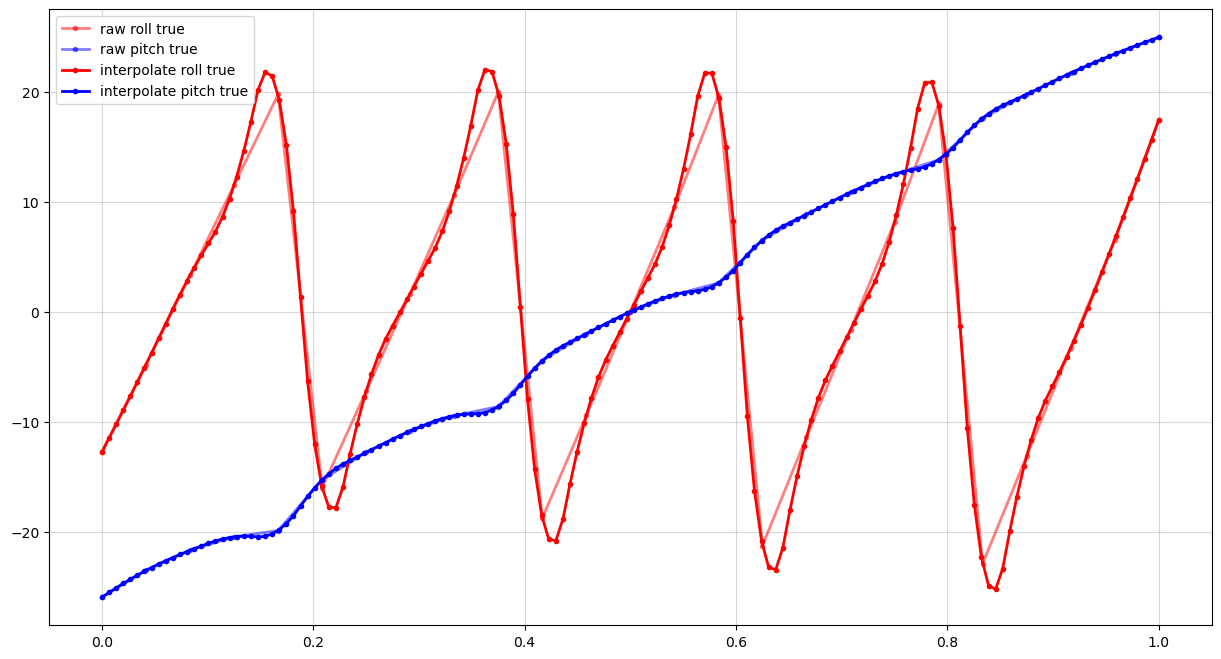

In [84]:
#====================== display roll & pitch =====================#

# display roll + pitch
plt.figure(figsize=(15, 8))
plt.plot(x_raw, df_sort_pitch_raw['roll_true'], 'o-', color='red', alpha=0.5, label='raw roll true', linewidth=2,
         markersize=3)
plt.plot(x_raw, df_sort_pitch_raw['pitch_true'], 'o-', color='blue', alpha=0.5, label='raw pitch true', linewidth=2,
         markersize=3)
plt.plot(x_new, df_pitch_quadratic_interpolated_data['roll_true'], 'o-', color='red', label='interpolate roll true',
         linewidth=2,
         markersize=3)
plt.plot(x_new, df_pitch_quadratic_interpolated_data['pitch_true'], 'o-', color='blue', label='interpolate pitch true',
         linewidth=2,
         markersize=3)
plt.legend(loc='upper left')
plt.grid(True, alpha=0.5)
plt.savefig(os.path.join(output_display_folder, "sort_pitch_interpolate_quadratic__roll+pitch.png"), dpi=300,
            bbox_inches='tight')
plt.show()
plt.close()


#====================== display pitch - related =====================#

# display roll - diameter & area
plt.figure(figsize=(15, 8))
plt.plot(df_pitch_quadratic_interpolated_data['pitch_true'], df_pitch_quadratic_interpolated_data['diameter_pnt1_x'], 'o-',
         color='red', alpha=0.5, label='diameter_pnt1_x', linewidth=2, markersize=4)
plt.plot(df_pitch_quadratic_interpolated_data['pitch_true'], df_pitch_quadratic_interpolated_data['diameter_pnt1_y'], 'o-',
         color='blue', alpha=0.5, label='diameter_pnt1_y', linewidth=2, markersize=4)
plt.plot(df_pitch_quadratic_interpolated_data['pitch_true'], df_pitch_quadratic_interpolated_data['diameter_pnt2_x'], 'o-',
         color='green', alpha=0.5, label='diameter_pnt2_x', linewidth=2, markersize=4)
plt.plot(df_pitch_quadratic_interpolated_data['pitch_true'], df_pitch_quadratic_interpolated_data['diameter_pnt2_y'], 'o-',
         color='cyan', alpha=0.5, label='diameter_pnt2_y', linewidth=2, markersize=4)
plt.plot(df_pitch_quadratic_interpolated_data['pitch_true'], df_pitch_quadratic_interpolated_data['diameter_orientation'], 'o-',
         color='violet', alpha=0.5, label='diameter_orientation', linewidth=2, markersize=4)
plt.plot(df_pitch_quadratic_interpolated_data['pitch_true'], df_pitch_quadratic_interpolated_data['diameter_distance'], 'o-',
         color='brown', alpha=0.5, label='diameter_distance', linewidth=2, markersize=4)
plt.plot(df_pitch_quadratic_interpolated_data['pitch_true'], df_pitch_quadratic_interpolated_data['max_contour_area'] / 100, 'o-',
         color='black', alpha=0.5, label='max_contour_area / 100', linewidth=2, markersize=4)
plt.legend(loc='upper left')
plt.grid(True, alpha=0.5)
plt.title("roll - diameter & area", fontsize=20)
plt.xlabel("roll [degree]", fontsize=14)
plt.ylabel("diameter & area", fontsize=14)
plt.savefig(os.path.join(output_display_folder, "sort_pitch_interpolate_quadratic__diameter.png"), dpi=300,
            bbox_inches='tight')
# plt.show()
plt.close()

# display roll - pole
plt.figure(figsize=(15, 8))
plt.plot(df_pitch_quadratic_interpolated_data['pitch_true'], df_pitch_quadratic_interpolated_data['pole_left_x'], 'o-', color='red',
         alpha=0.5, label='pole_left_x', linewidth=2, markersize=4)
plt.plot(df_pitch_quadratic_interpolated_data['pitch_true'], df_pitch_quadratic_interpolated_data['pole_left_y'], 'o-', color='blue',
         alpha=0.5, label='pole_left_y', linewidth=2, markersize=4)
plt.plot(df_pitch_quadratic_interpolated_data['pitch_true'], df_pitch_quadratic_interpolated_data['pole_right_x'], 'o-',
         color='green', alpha=0.5, label='pole_right_x', linewidth=2, markersize=4)
plt.plot(df_pitch_quadratic_interpolated_data['pitch_true'], df_pitch_quadratic_interpolated_data['pole_right_y'], 'o-',
         color='cyan', alpha=0.5, label='pole_right_y', linewidth=2, markersize=4)
plt.plot(df_pitch_quadratic_interpolated_data['pitch_true'], df_pitch_quadratic_interpolated_data['pole_top_x'], 'o-',
         color='yellow', alpha=0.5, label='pole_top_x', linewidth=2, markersize=4)
plt.plot(df_pitch_quadratic_interpolated_data['pitch_true'], df_pitch_quadratic_interpolated_data['pole_top_y'], 'o-', color='black',
         alpha=0.5, label='pole_top_y', linewidth=2, markersize=4)
plt.plot(df_pitch_quadratic_interpolated_data['pitch_true'], df_pitch_quadratic_interpolated_data['pole_bottom_x'], 'o-',
         color='magenta', alpha=0.5, label='pole_bottom_x', linewidth=2, markersize=4)
plt.plot(df_pitch_quadratic_interpolated_data['pitch_true'], df_pitch_quadratic_interpolated_data['pole_bottom_y'], 'o-',
         color='purple', alpha=0.5, label='pole_bottom_y', linewidth=2, markersize=4)
plt.plot(df_pitch_quadratic_interpolated_data['pitch_true'], df_pitch_quadratic_interpolated_data['pole_orientation_lr'], 'o-',
         color='brown', alpha=0.5, label='pole_orientation_lr', linewidth=2, markersize=4)
plt.plot(df_pitch_quadratic_interpolated_data['pitch_true'], df_pitch_quadratic_interpolated_data['pole_orientation_tb'], 'o-',
         color='orange', alpha=0.5, label='pole_orientation_tb', linewidth=2, markersize=4)
plt.legend(loc='upper left')
plt.grid(True, alpha=0.5)
plt.title("roll - pole", fontsize=20)
plt.xlabel("roll [degree]", fontsize=14)
plt.ylabel("pole", fontsize=14)
plt.savefig(os.path.join(output_display_folder, "sort_pitch_interpolate_quadratic__poles.png"), dpi=300,
            bbox_inches='tight')
# plt.show()
plt.close()

# display roll - touch line
plt.figure(figsize=(15, 8))
plt.plot(df_pitch_quadratic_interpolated_data['pitch_true'], df_pitch_quadratic_interpolated_data['touch_line_topmost_point_x'],
         'o-', color='red', alpha=0.5, label='touch_line_topmost_point_x', linewidth=2, markersize=4)
plt.plot(df_pitch_quadratic_interpolated_data['pitch_true'], df_pitch_quadratic_interpolated_data['touch_line_topmost_point_y'],
         'o-', color='blue', alpha=0.5, label='touch_line_topmost_point_y', linewidth=2, markersize=4)
plt.plot(df_pitch_quadratic_interpolated_data['pitch_true'], df_pitch_quadratic_interpolated_data['touch_line_bottommost_point_x'],
         'o-', color='green', alpha=0.5, label='touch_line_bottommost_point_x', linewidth=2, markersize=4)
plt.plot(df_pitch_quadratic_interpolated_data['pitch_true'], df_pitch_quadratic_interpolated_data['touch_line_bottommost_point_y'],
         'o-', color='cyan', alpha=0.5, label='touch_line_bottommost_point_y', linewidth=2, markersize=4)
plt.plot(df_pitch_quadratic_interpolated_data['pitch_true'], df_pitch_quadratic_interpolated_data['touch_line_total_length'], 'o-',
         color='yellow', alpha=0.5, label='touch_line_total_length', linewidth=2, markersize=4)
plt.plot(df_pitch_quadratic_interpolated_data['pitch_true'], df_pitch_quadratic_interpolated_data['touch_line_num_points'], 'o-',
         color='black', alpha=0.5, label='touch_line_num_points', linewidth=2, markersize=4)
plt.legend(loc='upper left')
plt.grid(True, alpha=0.5)
plt.title("roll - window touch", fontsize=20)
plt.xlabel("roll [degree]", fontsize=14)
plt.ylabel("window touch", fontsize=14)
plt.savefig(os.path.join(output_display_folder, "sort_pitch_interpolate_quadratic__window_touch.png"), dpi=300,
            bbox_inches='tight')
# plt.show()
plt.close()